#  Global Power Plant Database
## Problem Statement:
### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database
The database includes the following indicators:

- country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long (text): longer form of the country designation
- name (text): name or title of the power plant, generally in Romanized form
- gppd_idnr (text): 10 or 12 character identifier for the power plant
- capacity_mw (number): electrical generating capacity in megawatts
- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel (text): energy source used in primary electricity generation or export
- other_fuel1 (text): energy source used in electricity generation or export
- other_fuel2 (text): energy source used in electricity generation or export
- other_fuel3 (text): energy source used in electricity generation or export
- commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
- owner (text): majority shareholder of the power plant, generally in Romanized form
- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url (text): web document corresponding to the source field
- geolocation_source (text): attribution for geolocation information
- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data (number): year the capacity information was reported
- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source (text): attribution for the reported generation information
- estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
- estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
- estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
- estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
- estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
- estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
- estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
- estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
- estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
- estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017
### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories.

#### Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw

- Importing require library for performing EDA, Data Wrangling and data cleaning

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing CSV File
df1=pd.read_csv('database_AUS.csv')
df2=pd.read_csv('database_IND.csv')
df3=pd.read_csv('database_USA.csv')

In [3]:
data = pd.concat([df1, df2, df3], axis=0)

In [4]:
data.head()

country country_long                   name   gppd_idnr  capacity_mw  \
0     AUS    Australia       Adelaide Airport  AUS0000433         0.11   
1     AUS    Australia   Adelaide Showgrounds  AUS0000432         1.00   
2     AUS    Australia       Albany Wind Farm  AUS0000065        21.60   
3     AUS    Australia  Alice Springs Airport  AUS0000469         0.24   
4     AUS    Australia           Amcor Gawler  AUS0000231         4.00   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0  -34.9387   138.5377        Solar         NaN         NaN  ...   
1  -34.9453   138.5882        Solar         NaN         NaN  ...   
2  -35.0641   117.7977         Wind         NaN         NaN  ...   
3  -23.7966   133.8971        Solar         NaN         NaN  ...   
4  -34.5509   138.7659          Oil         NaN         NaN  ...   

  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                2019.0                  NaN                 NaN   
1                2019.0                  NaN                 NaN   
2                2019.0            89.595278          102.642778   
3                2019.0                  NaN                 NaN   
4                2019.0                  NaN                 NaN   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2           96.555556           95.872778           85.900278   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   generation_gwh_2018  generation_gwh_2019            generation_data_source  \
0                  NaN                  NaN                               NaN   
1                  NaN                  NaN                               NaN   
2            92.682222                  NaN  Australia Clean Energy Regulator   
3                  NaN                  NaN                               NaN   
4                  NaN                  NaN                               NaN   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [5]:
data.shape

(13298, 27)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url        

- lots of colums having missing values

In [7]:
data.duplicated().sum() # This will check if any duplicate entry or duplicate row with same value exis

0

- No Duplicate Entry Present in data.

- first remove empty columns and non relevalent columns.

In [8]:
data.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [9]:
#Finding what percentage of data is missing from the dataset
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(data))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                      11670       87.757558
generation_gwh_2013               6128       46.082118
generation_gwh_2014               5764       43.344864
generation_gwh_2015               5305       39.893217
generation_gwh_2016               4597       34.569108
generation_gwh_2017               4006       30.124831
generation_gwh_2019               3521       26.477666
generation_gwh_2018               3440       25.868552
commissioning_year                2644       19.882689
generation_data_source            2463       18.521582
primary_fuel                      2004       15.069935
latitude                            78        0.586554
longitude                           78        0.586554
geolocation_source                  23        0.172958
capacity_mw                          6        0.045120
source                               0        0.000000
name                                 0        0.000000


## Proposed Strategy to Handle Missing data:
- As Geolocation source is categorical data we can impute it with mode of category.
- longitude and latitude can be impute with mean or median of longitude and latitude. This imputation will not distrub statstical balance of data as mean will be same at the end.
- As commissioning year for most of industrial powerplant is missing(40%) after checking correlation we will decide to keep or drop this features.
- In generation_data_source 50% data is missing and it doesnot have any importance in our analysis. So it is better to drop this feature.
- There are 7 Different columns of GenerationGW-Hours for year 2013 to 2019. Its dive into it further
It is important feature in for coal and hydro powerplant.
- It is natural to have missing data in this category. As Oil,Gas based Powerplant operated in intermitant periodic way and some renewable powerplant like wind,tide are operated seasonaly.
- Some new powerplant commission between 2013 and 2019. For these powerplant some data will definitely available.
- We cannot do any mean or median imputation here as different powerplant have different generation capacity & Generation per year depend on runtime of powerplant.
- We all know old powerplant normally kept off unless more demand of generation required. Reason to kept is low efficiency & high operating cost.
- We can neglect real value data for such important feature. We will keep this feature along with missing value and perform further investigation.
-Other_fuel1 is another feature of some importance with missing value. Lets dive into it :
- Not every powerplant build to work with alternate fuel.
- Idea of other fuel is totally irrelevant to renewable energy source based powerplant like solar,wind,hydro.
- First talk about powerplant for which concept of other fuel is applicable. We can impute them based domain knowledge.
- Alternate Fuel of Coal based powerplant mostly is Oil or cogeneration.
- Alternate Fuel of Industrial Oil based powerplant is Gas.
- Alternate Fuel of Industrial Gas based powerplant is Oil.
- We cannot define any alternative fuel for nuclear powerplant as it sole based on plant design & so many option.
- For Renewable energy source based powerplant no alternate fuel needed. As it is categorical feature we can impute these powerplant with "Not Applicable". At end we are going Encoding these labels, 'Not Applicable' will be just one other additional label in encoding. Making no alternation on final result.

## Missing value Impuatation

In [10]:
data_reset_index = data.reset_index(drop=True)   # Reset index to avoid duplicate labels

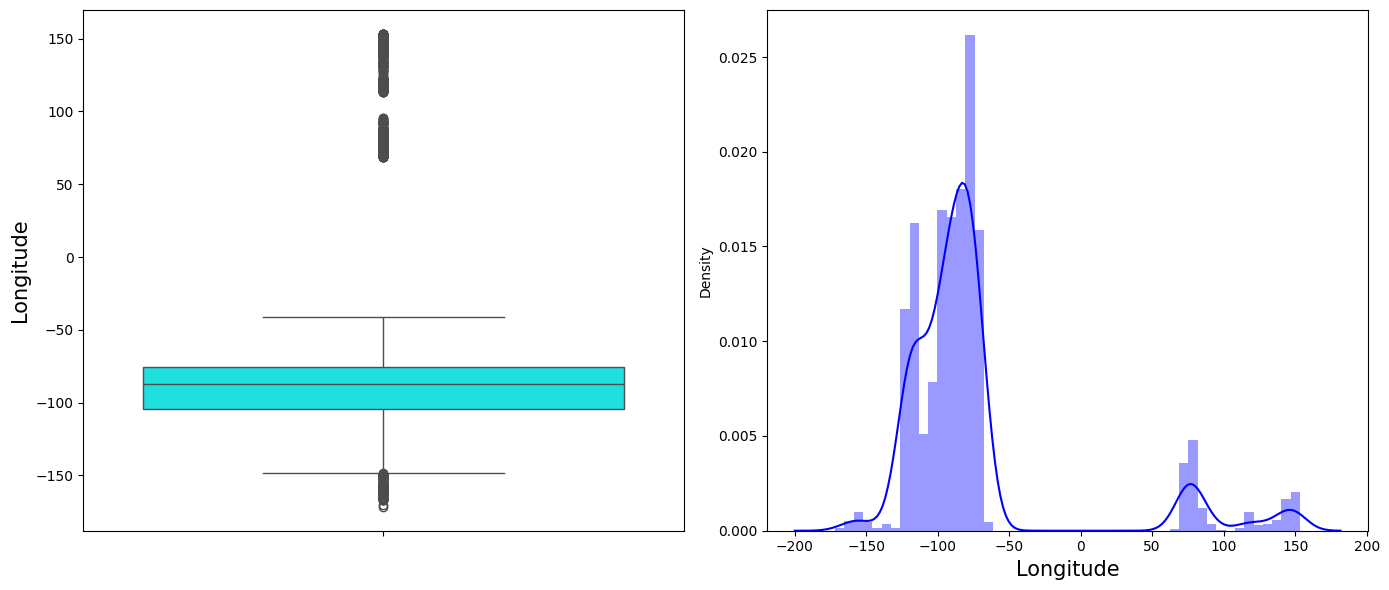

In [11]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Create the first subplot for the boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y='longitude', data=data_reset_index, color='cyan')
plt.ylabel('Longitude', fontsize=15)

# Create the second subplot for the distribution plot
plt.subplot(1, 2, 2)
sns.distplot(data_reset_index['longitude'], color='blue')
plt.xlabel('Longitude', fontsize=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Based on presense of outliers we will impute longitude we with median.

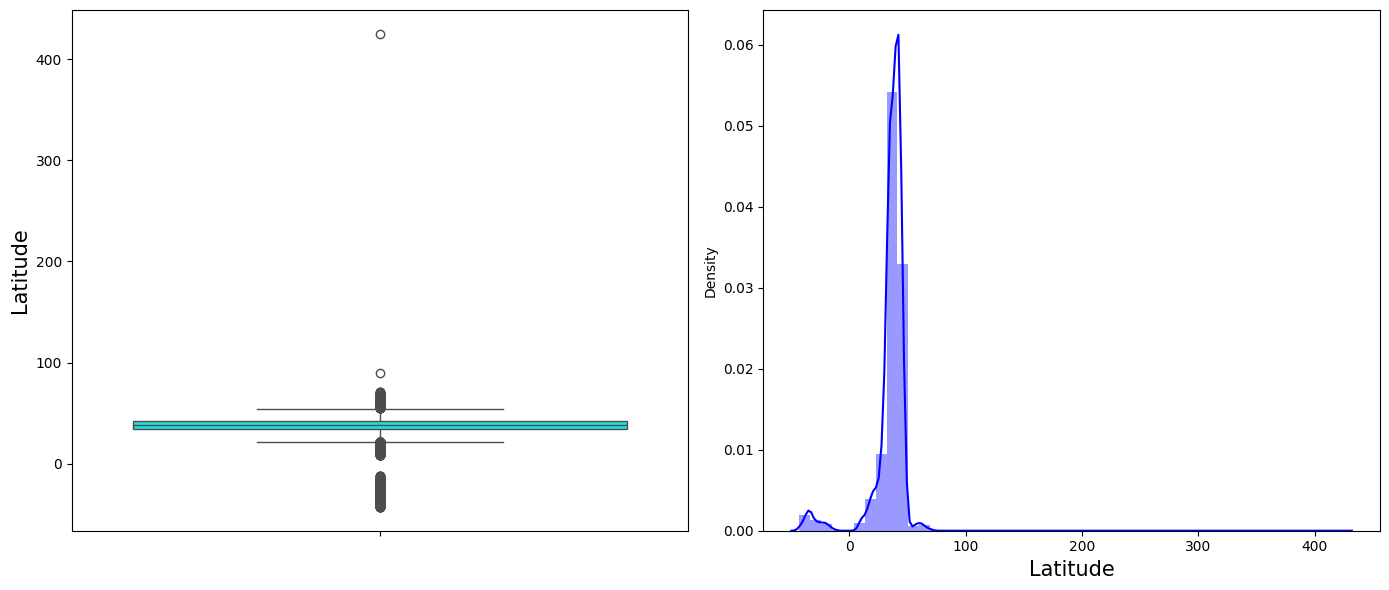

In [12]:
# Reset index to avoid duplicate labels
data_reset_index = data.reset_index(drop=True)

# Set the figure size
plt.figure(figsize=(14, 6))

# Create the first subplot for the boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y='latitude', data=data_reset_index, color='cyan')
plt.ylabel('Latitude', fontsize=15)

# Create the second subplot for the distribution plot
plt.subplot(1, 2, 2)
sns.distplot(data_reset_index['latitude'], color='blue')
plt.xlabel('Latitude', fontsize=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Based on absense of outliers we will impute latitude we with mean.

In [13]:
# Missing Value Imputation of 'geolocation_source' with mode
data['geolocation_source'] = data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])

# Missing Value Imputation of 'longitude' with median
data['longitude'] = data['longitude'].fillna(data['longitude'].median())

# Missing Value Imputation of 'latitude' with mean
data['latitude'] = data['latitude'].fillna(data['latitude'].mean())


In [14]:
# Calculate the total missing values for each column
missing_values = data.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values for each column
percentage_missing_values = (missing_values / len(data)) * 100

# Concatenate the missing values count and percentage into a DataFrame
result = pd.concat([missing_values, percentage_missing_values], axis=1, keys=['Missing Values', '% Missing data'])

# Print the result
print(result)


                        Missing Values  % Missing data
other_fuel1                      11670       87.757558
generation_gwh_2013               6128       46.082118
generation_gwh_2014               5764       43.344864
generation_gwh_2015               5305       39.893217
generation_gwh_2016               4597       34.569108
generation_gwh_2017               4006       30.124831
generation_gwh_2019               3521       26.477666
generation_gwh_2018               3440       25.868552
commissioning_year                2644       19.882689
generation_data_source            2463       18.521582
primary_fuel                      2004       15.069935
capacity_mw                          6        0.045120
name                                 0        0.000000
source                               0        0.000000
longitude                            0        0.000000
latitude                             0        0.000000
geolocation_source                   0        0.000000


## Statistical Matrix

In [15]:
data.describe().T

count         mean          std        min  \
capacity_mw          13292.0   117.738717   347.169038     0.0000   
latitude             13298.0    35.053213    15.398830   -42.8883   
longitude            13298.0   -73.873706    62.692711  -171.7124   
commissioning_year   10654.0  1998.184904    24.017781  1896.0000   
generation_gwh_2013   7170.0   563.383222  2030.523760  -947.6000   
generation_gwh_2014   7534.0   635.739731  2193.172655  -989.6190   
generation_gwh_2015   7993.0   616.801877  2148.167470  -864.4280   
generation_gwh_2016   8701.0   561.784508  2050.411295  -768.6200   
generation_gwh_2017   9292.0   532.472482  2001.411908  -934.9440   
generation_gwh_2018   9858.0   513.679016  1963.485305  -982.6220   
generation_gwh_2019   9777.0   421.938592  1692.852318  -780.3390   

                             25%          50%          75%         max  
capacity_mw             1.500000     5.500000    52.725000   6809.0000  
latitude               33.914250    38.330650    42.166025    425.2461  
longitude            -104.583400   -87.346000   -75.535425    153.4341  
commissioning_year   1988.000000  2008.000000  2015.000000   2020.0000  
generation_gwh_2013     1.653075    21.384500   185.326498  31431.0800  
generation_gwh_2014     2.018000    22.241000   217.069500  32320.9170  
generation_gwh_2015     2.140000    19.504000   200.279000  32525.5950  
generation_gwh_2016     2.108000    15.410278   173.348004  32377.4770  
generation_gwh_2017     2.063750    13.433861   157.889688  35116.0000  
generation_gwh_2018     2.141250    12.308500   149.141249  35136.0000  
generation_gwh_2019     2.659000    11.280130   120.862000  31920.3680

## capacity_mw:
- Count: 13,292
- Mean: 117.738717
- Standard Deviation: 347.169038
- Minimum: 0.0000
- 25th Percentile (Q1): 1.500000
- Median (Q2 or 50th Percentile): 5.500000
- 75th Percentile (Q3): 52.725000
- Maximum: 6809.0000
## latitude:
- Count: 13,298
- Mean: 35.053213
- Standard Deviation: 15.398830
- Minimum: -42.8883
- 25th Percentile (Q1): 33.914250
- Median (Q2 or 50th Percentile): 38.330650
- 75th Percentile (Q3): 42.166025
- Maximum: 425.2461
## longitude:
- Count: 13,298
-  Mean: -73.873706
- Standard Deviation: 62.692711
- Minimum: -171.7124
- 25th Percentile (Q1): -104.583400
- Median (Q2 or 50th Percentile): -87.346000
- 75th Percentile (Q3): -75.535425
- Maximum: 153.4341
## commissioning_year:
- Count: 10,654
- Mean: 1998.184904
- Standard Deviation: 24.017781
- Minimum: 1896.0000
- 25th Percentile (Q1): 1988.000000
- Median (Q2 or 50th Percentile): 2008.000000
- 75th Percentile (Q3): 2015.000000
- Maximum: 2020.0000
- generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019:
- Count: Varies (from 7,170 to 9,858)
- Mean, Standard Deviation, Minimum, 25th Percentile, Median, 75th Percentile, and Maximum are provided for each column.

# Regression Target feature - Capacity

**Before visualing feature let find details about Smallest & Biggest Powerplant**

In [16]:
print('Minimum Capacity of Powerplant:',data.capacity_mw.min())
print('Maximum Capacity of Powerplant:',data.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 6809.0


In [17]:
data.loc[data.capacity_mw==6809.0]

name  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
4192  Grand Coulee       6809.0   47.9575  -118.9773        Hydro         NaN   

      commissioning_year                                  source  \
4192         1967.470333  U.S. Energy Information Administration   

                          geolocation_source  generation_gwh_2013  \
4192  U.S. Energy Information Administration            21073.181   

      generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
4192            20261.569            18878.623            19011.492   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
4192             20983.99            21042.561            16639.421   

                      generation_data_source  
4192  U.S. Energy Information Administration

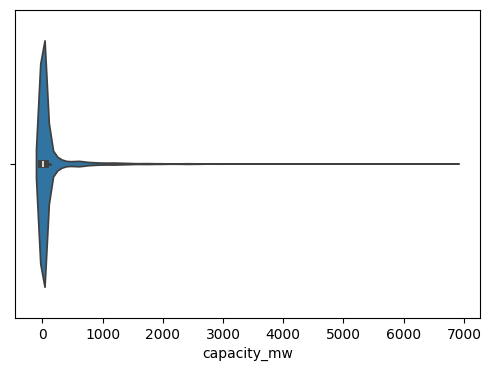

In [18]:
plt.figure(figsize=(6,4))
sns.violinplot(data.capacity_mw,orient='h')
plt.show()

**We can see there are very powerplant of capacity more than 1500 MW. Let check**

In [19]:
data.loc[data.capacity_mw >1500].shape

(194, 17)

**There only 17 powerplant of capacity more than 1500 MW.**

In [20]:
pd.crosstab(data['capacity_mw'],data["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

In [21]:
data.primary_fuel.value_counts()

primary_fuel
Solar           3480
Gas             2031
Hydro           1783
Wind            1340
Oil              961
Waste            595
Coal             572
Biomass          230
Storage          104
Nuclear           72
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: count, dtype: int64

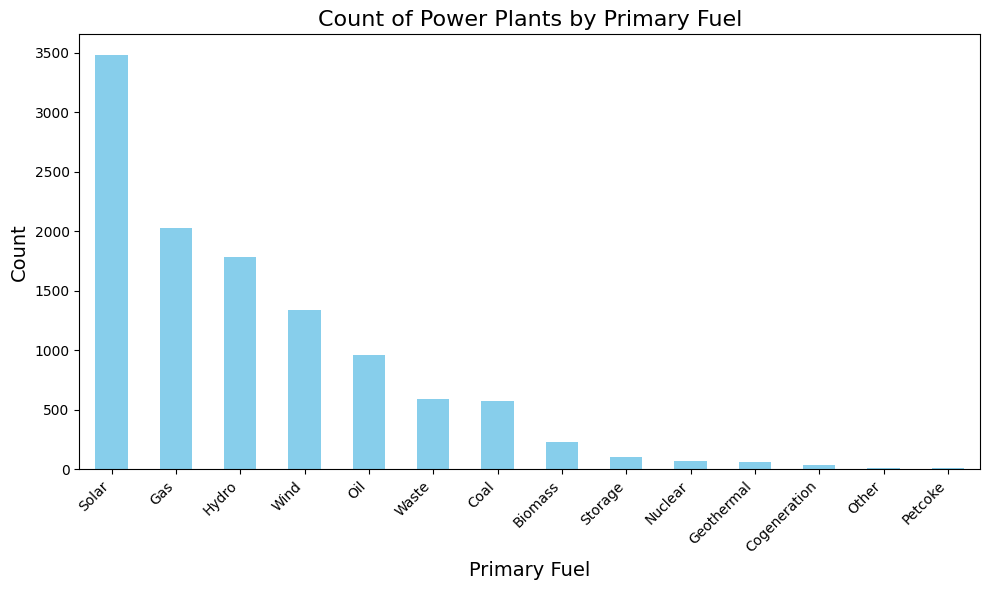

In [22]:
# Get the counts of each unique primary fuel category
fuel_counts = data['primary_fuel'].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
fuel_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Power Plants by Primary Fuel', fontsize=16)
plt.xlabel('Primary Fuel', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 **Here we see top most count power primary fuel plant are**
 - Solar
 - Gas
 - Hydro
 - Wind
 - Oil

**Let find Total Generation capacity of all powerplant, afterwards we will look for capacity of powerplant according to fuel type**

In [23]:
print('Total Power Generation Capacity of all Power Plants:',data['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 1564983.0219999999 MW


- Now Let check sector wise Capacity.

In [24]:
data["capacity_mw"].groupby(data["primary_fuel"]).agg([sum])

sum
primary_fuel            
Biomass         6715.960
Coal          480531.320
Cogeneration    1042.000
Gas           591625.326
Geothermal      3889.200
Hydro         156623.420
Nuclear       113013.100
Oil            40081.580
Other            572.400
Petcoke         2361.600
Solar          43423.400
Storage          815.600
Waste           9957.126
Wind          114330.990

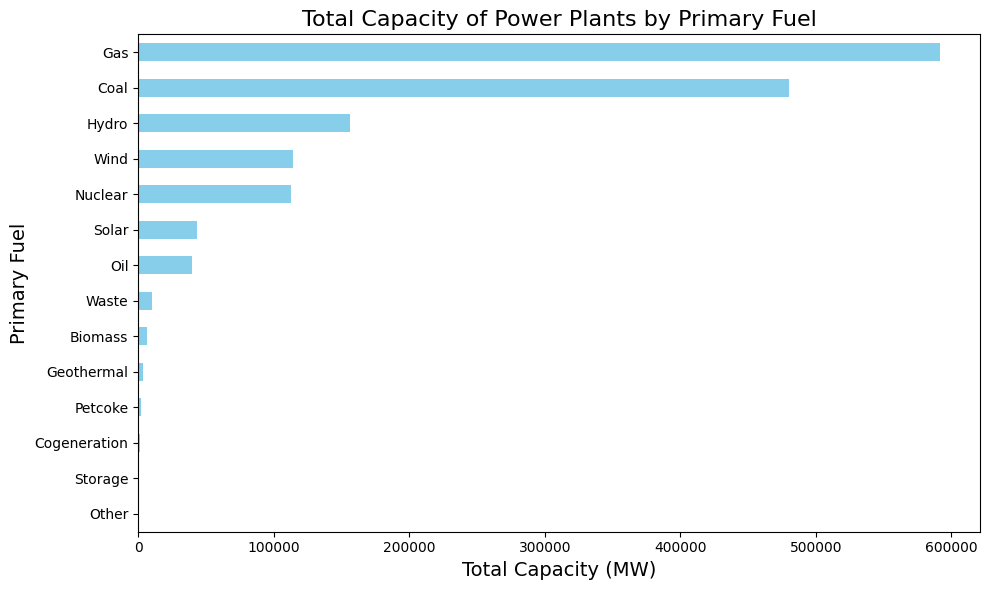

In [25]:

# Group the capacity of power plants by their primary fuel and aggregate the sum
fuel_capacity = data.groupby('primary_fuel')['capacity_mw'].sum()

# Sort the aggregated capacity values in ascending order
fuel_capacity_sorted = fuel_capacity.sort_values(ascending=True)

# Plot the bar plot
plt.figure(figsize=(10, 6))
fuel_capacity_sorted.plot(kind='barh', color='skyblue')  # Use 'barh' for horizontal bar plot
plt.title('Total Capacity of Power Plants by Primary Fuel', fontsize=16)
plt.xlabel('Total Capacity (MW)', fontsize=14)
plt.ylabel('Primary Fuel', fontsize=14)
plt.tight_layout()
plt.show()


**Total PowerGeneration Maximum comes from Coal**

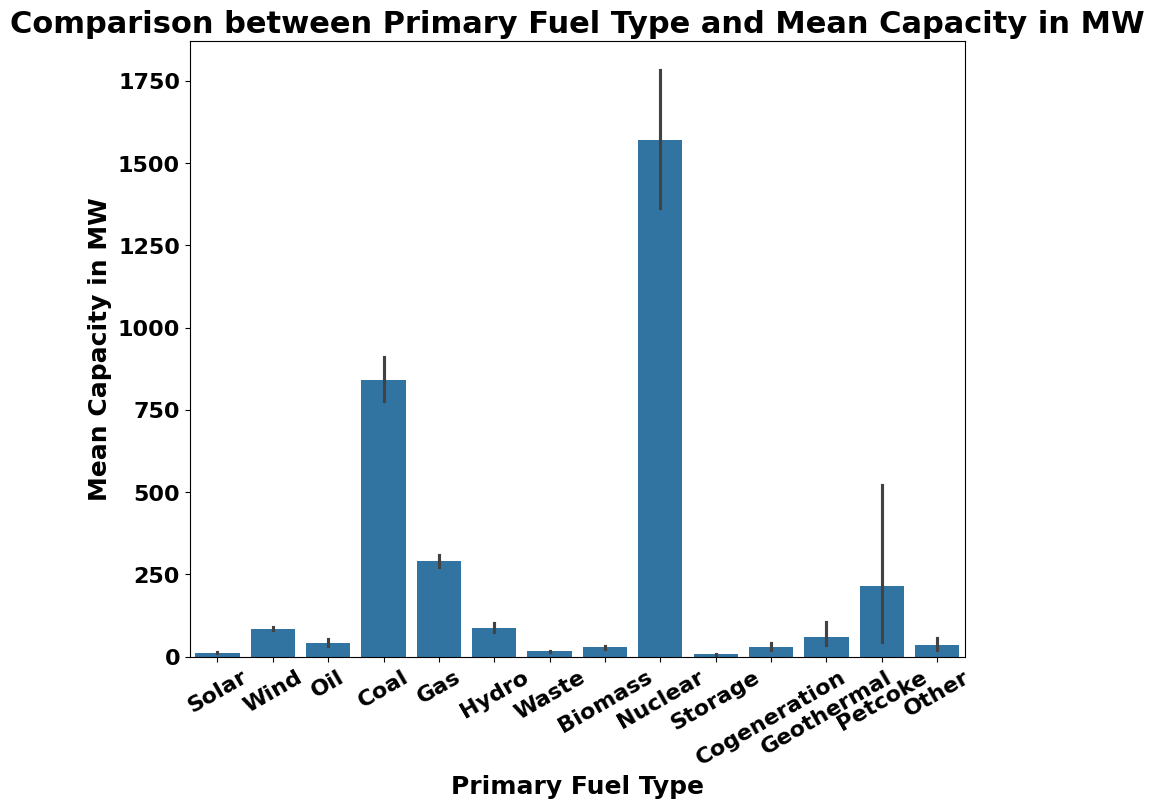

In [26]:
# Reset index to avoid duplicate labels
data_reset_index = data.reset_index(drop=True)

# Plot the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x="primary_fuel", y="capacity_mw", data=data_reset_index)
plt.title('Comparison between Primary Fuel Type and Mean Capacity in MW', fontsize=22, fontweight='bold')
plt.xlabel('Primary Fuel Type', fontsize=18, fontweight='bold')
plt.ylabel('Mean Capacity in MW', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=30)
plt.yticks(fontsize=16, fontweight='bold')
plt.show()

In [27]:
# Reset index to avoid duplicate labels
data.reset_index(drop=True, inplace=True)


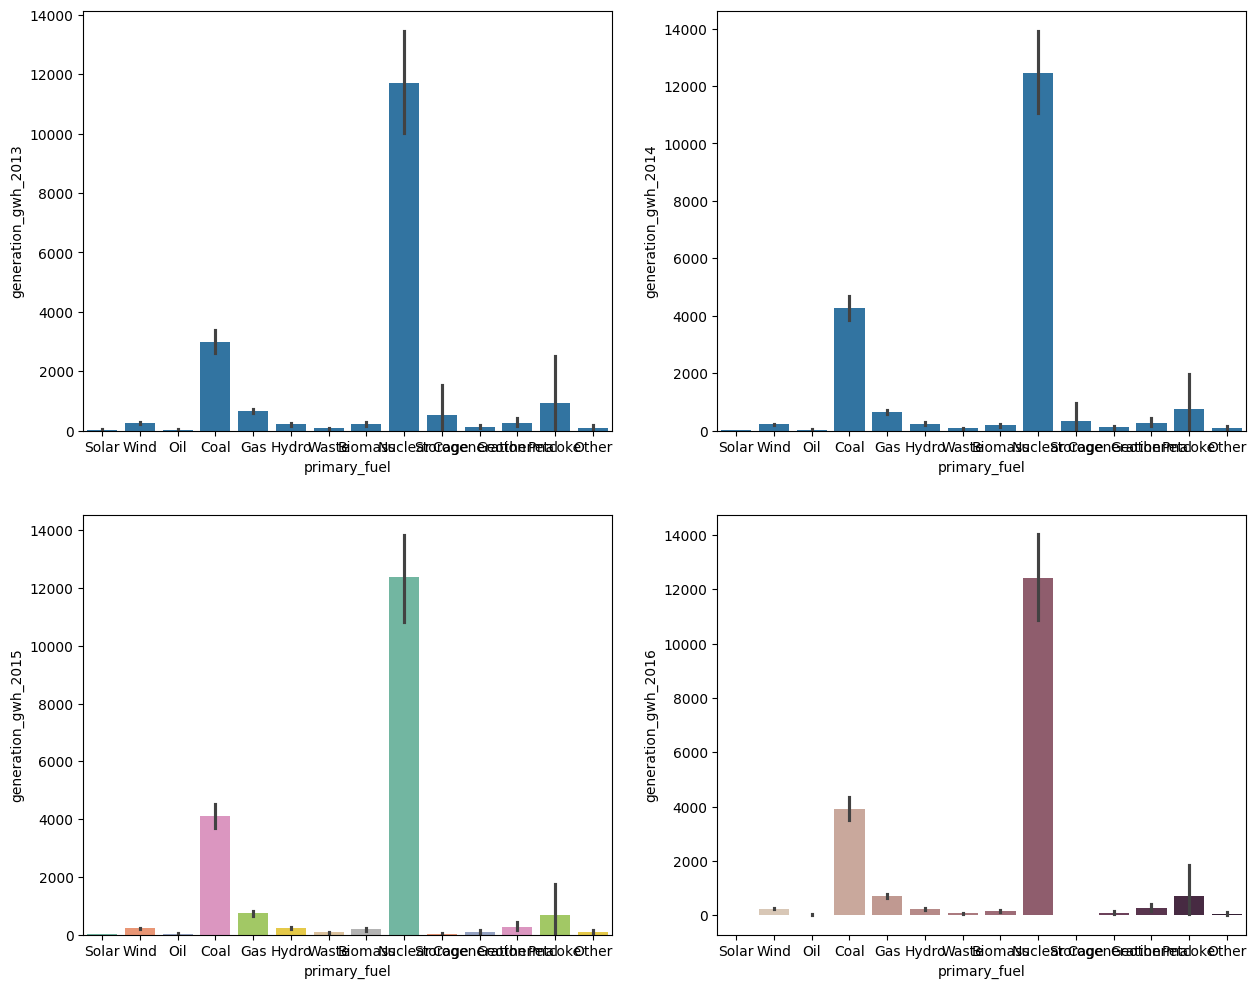

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel', y='generation_gwh_2013', ax=axes[0, 0], data=data)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel', y='generation_gwh_2014', ax=axes[0, 1], data=data)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel', y='generation_gwh_2015', ax=axes[1, 0], data=data, palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel', y='generation_gwh_2016', ax=axes[1, 1], data=data, palette="ch:.25")
plt.show()


- From the graph we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal. Reason is high efficieny of Nuclear powerplants.
- Other fuel types have very less contribution to power generation.

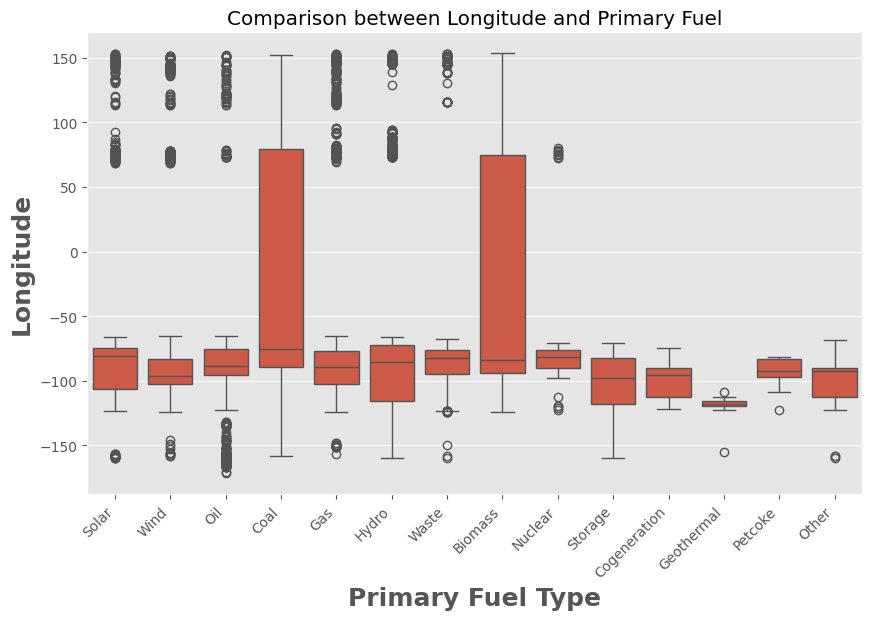

In [29]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparison between Longitude and Primary Fuel')
a = sns.boxplot(x=data['primary_fuel'], y=data["longitude"])
a.set_xlabel('Primary Fuel Type', fontsize=18, fontweight='bold')
a.set_ylabel('Longitude', fontsize=18, fontweight='bold')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels
plt.show()


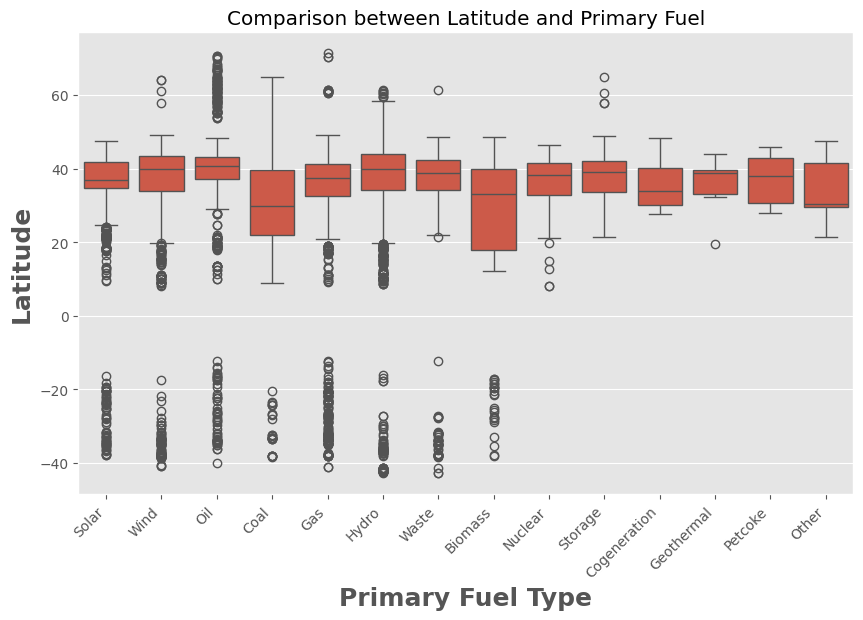

In [30]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparison between Latitude and Primary Fuel')
a = sns.boxplot(x=data['primary_fuel'], y=data["latitude"])
a.set_xlabel('Primary Fuel Type', fontsize=18, fontweight='bold')
a.set_ylabel('Latitude', fontsize=18, fontweight='bold')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels
plt.show()


#  Distribution of features

In [31]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018','generation_gwh_2019', 'Power_plant_age']

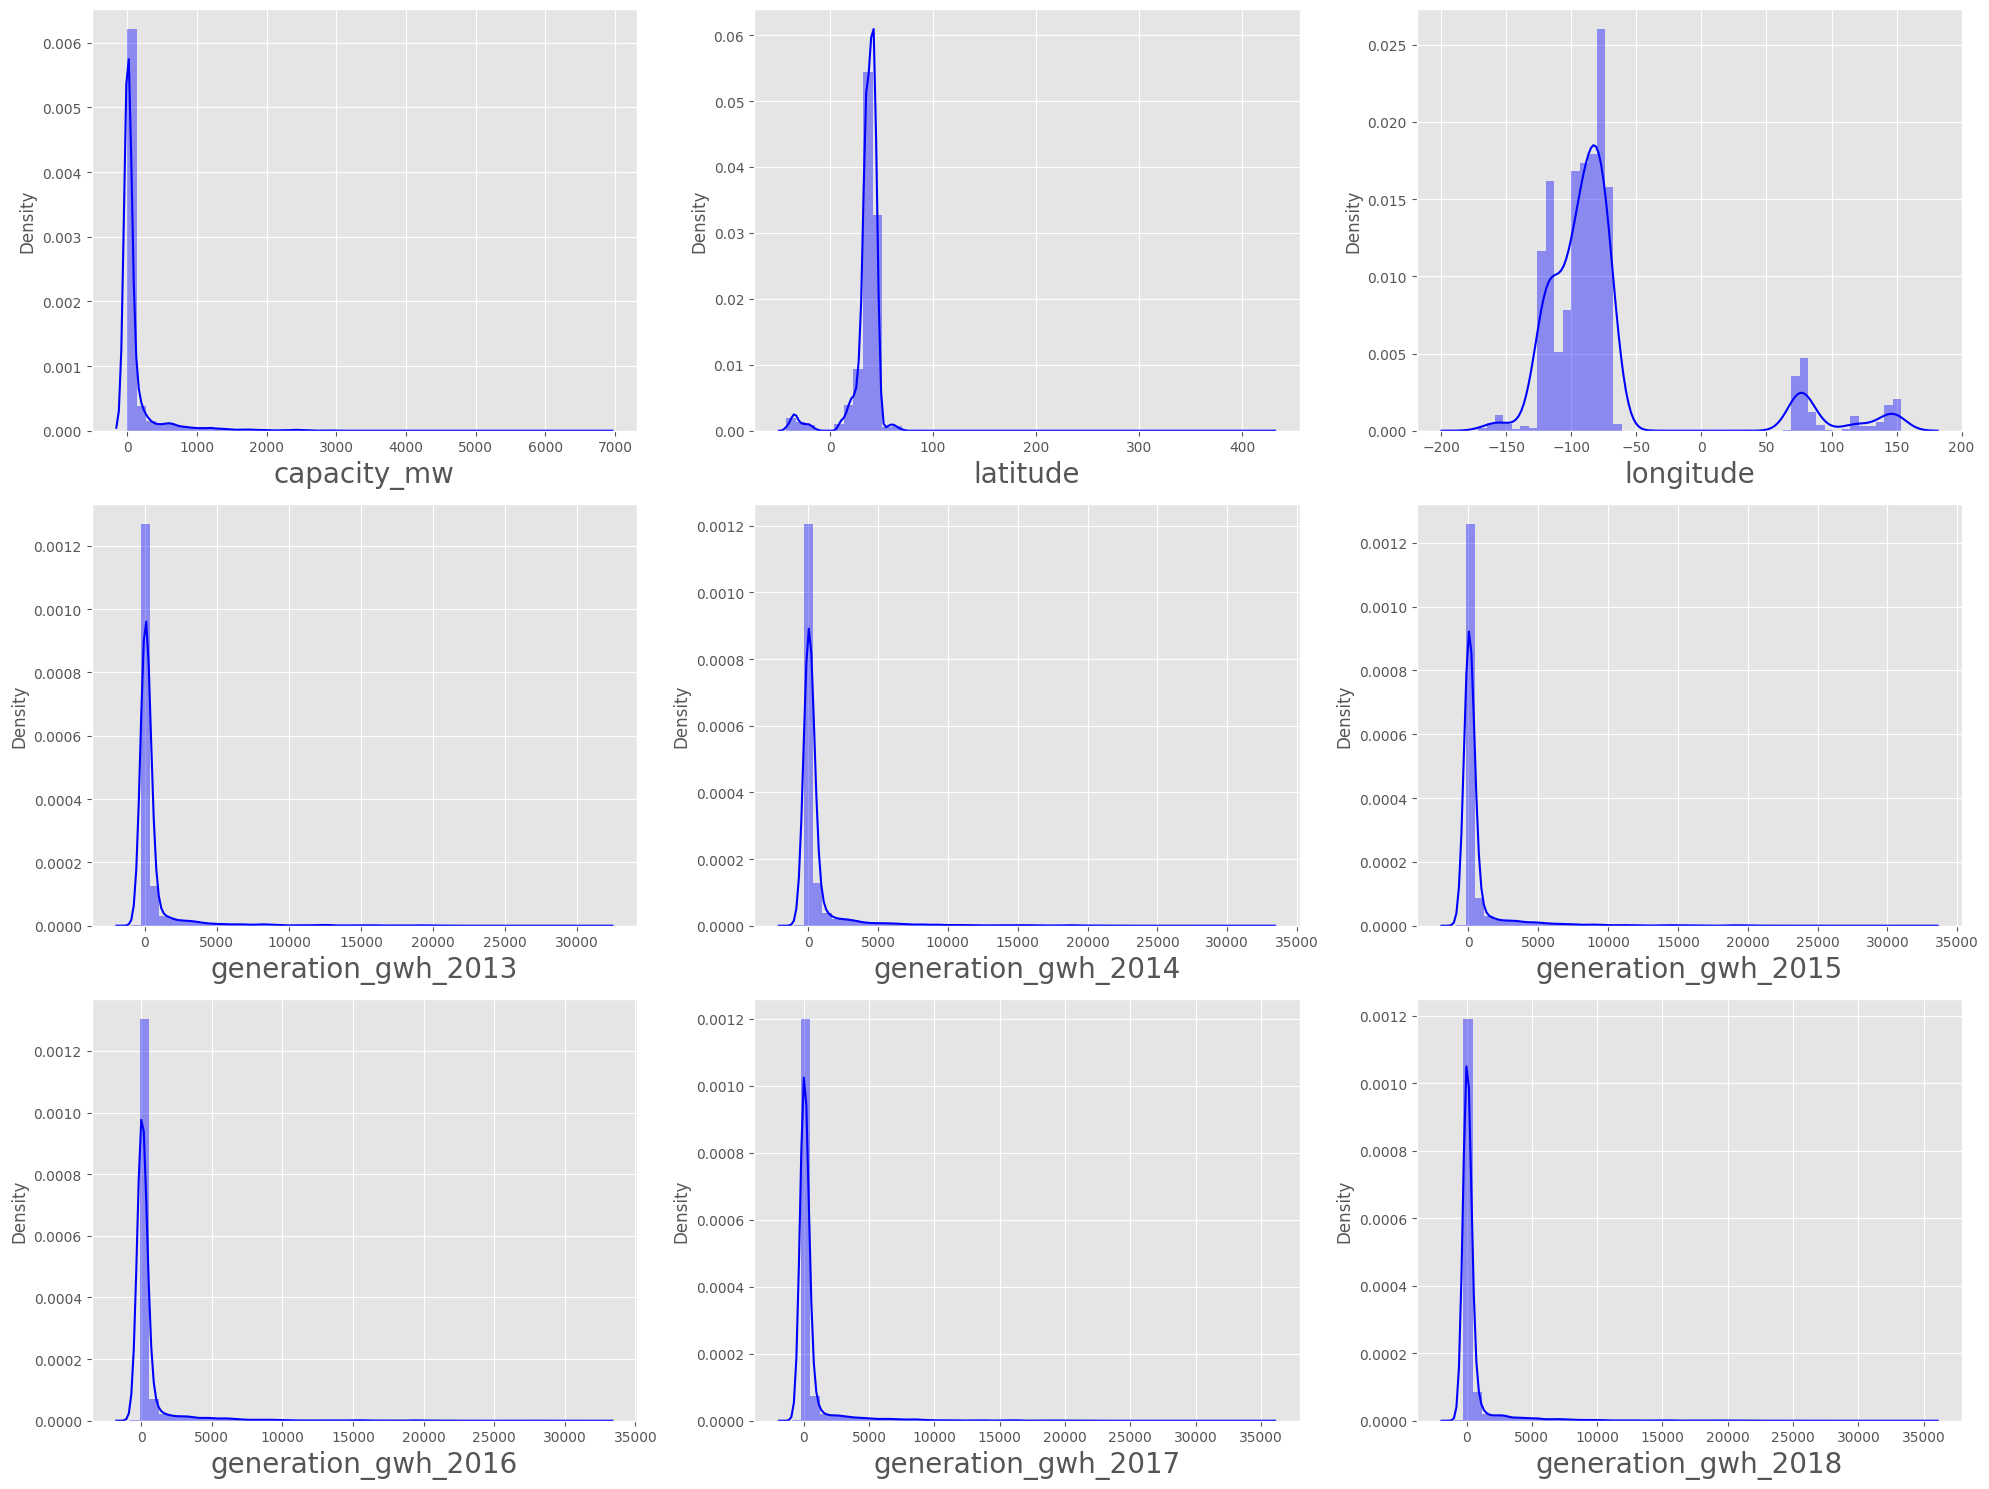

In [32]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- From the above distributionplot we can observe that the data is not normally distributed in all the columns except latitude and longitude.
- In most of the columns the mean is greater than the median which means they are skewed to right.
- We will remove the skewness in all these columns except the label later.

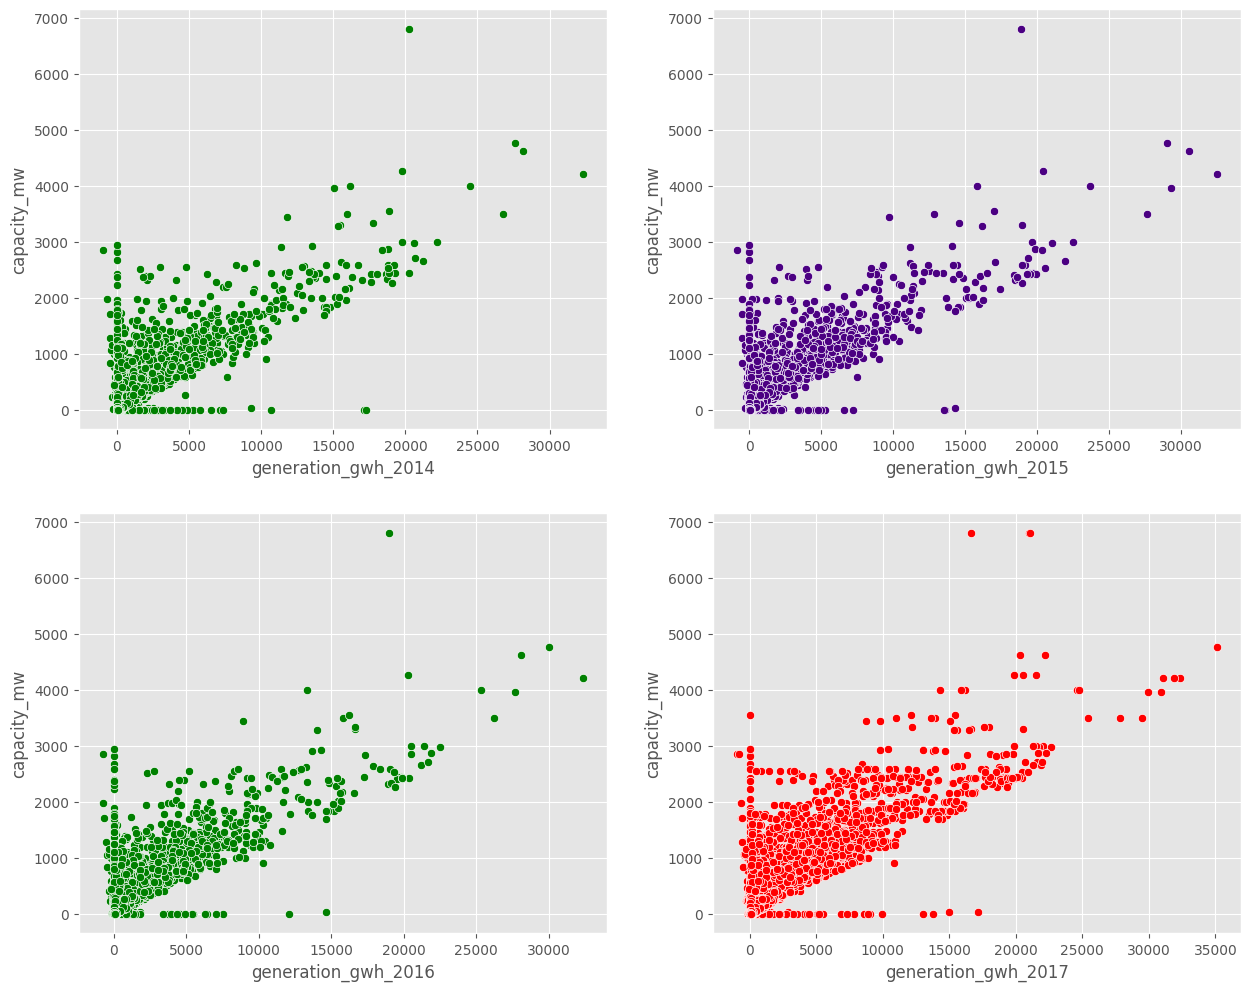

In [33]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=data,color="g")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=data,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=data,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=data,color="r")
# Checking generation growth in 2018
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=data,color="r")
# Checking generation growth in 2019
sns.scatterplot(x='generation_gwh_2019',y='capacity_mw',ax=axes[1,1],data=data,color="r")
plt.show()

Observation:
- There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
- The plot shows the electricity generation reported for the years 2014,2015,2016,2017 have high capacity of above 1000mw. Also the power generation growth is more than 5000gwh in all the years.
- As the electricity generation growth increases, the capacity of plant also increases.

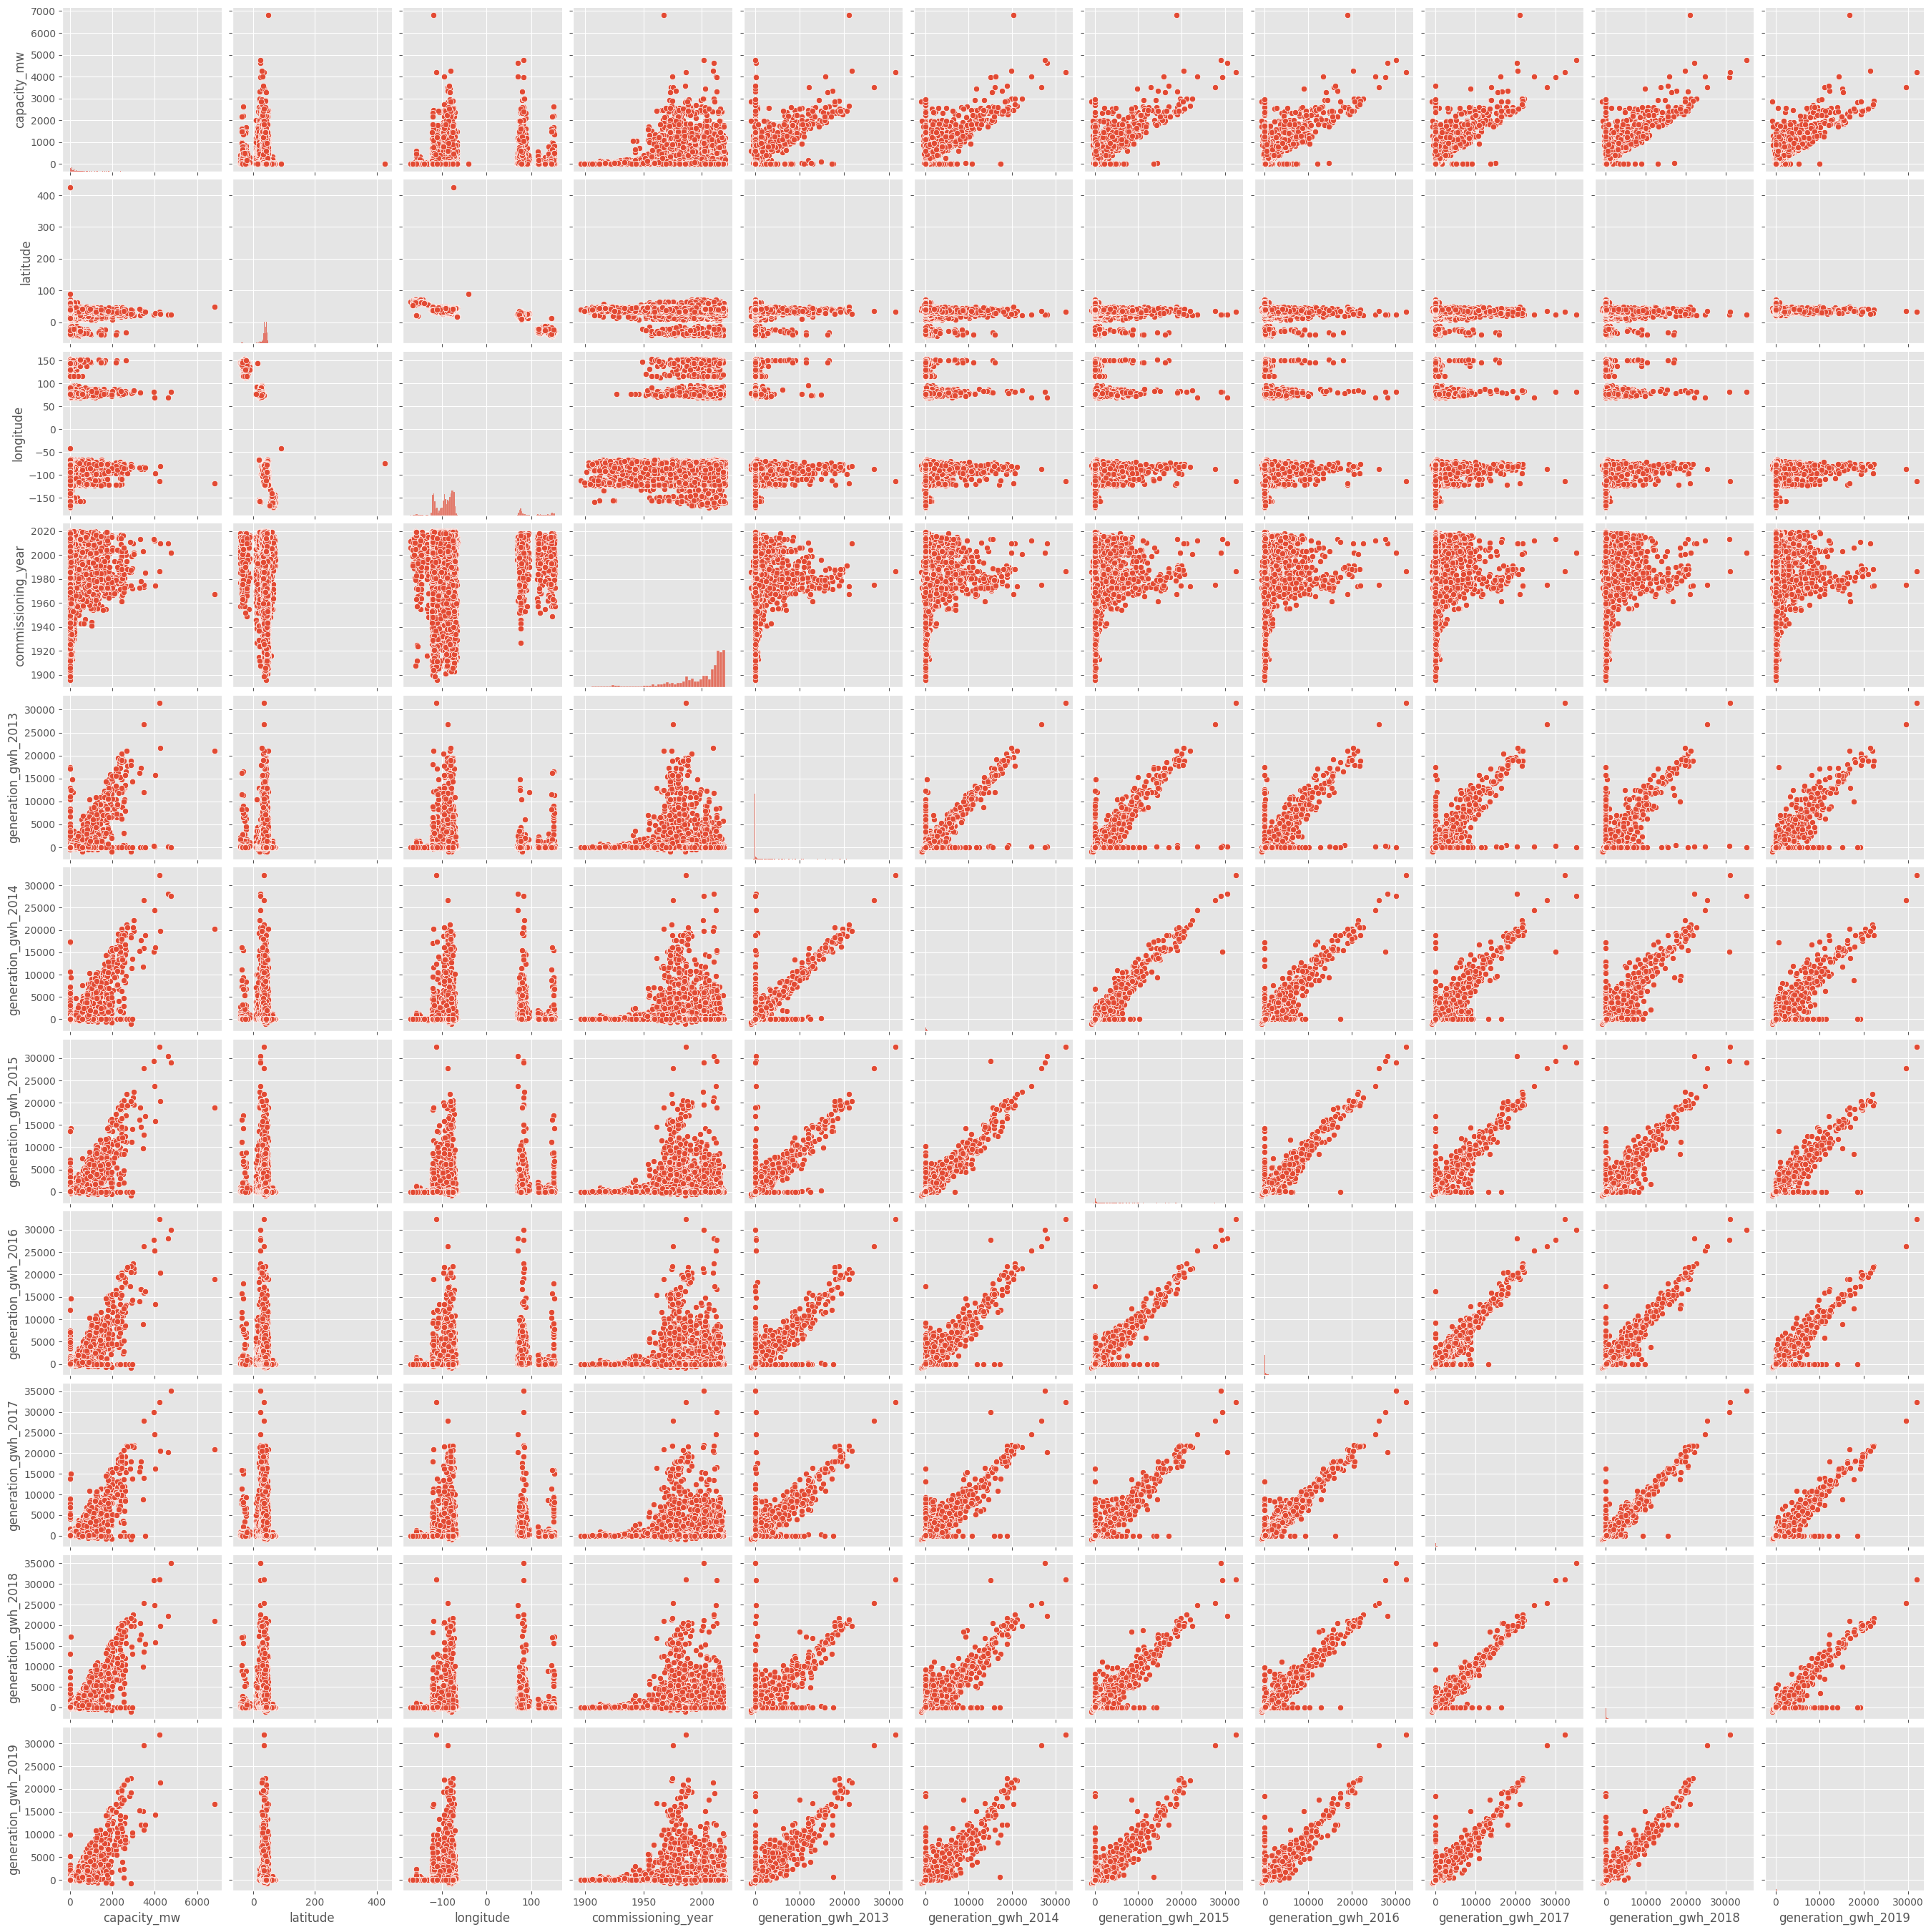

In [34]:
#Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(data)

## Comment:
- Most of the features have strong linear relationship and correlation with each other.
- From the plot we can observe the outliers in some of the columns.
- We can see histogram on the diagonal.

## Encoding categorical data

In [35]:
data.drop(columns=['name'],axis=1,inplace=True)

In [36]:
data.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [37]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [38]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    data[i] = le.fit_transform(data[i])
data.head()

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0         0.11  -34.9387   138.5377            10           12   
1         1.00  -34.9453   138.5882            10           12   
2        21.60  -35.0641   117.7977            13           12   
3         0.24  -23.7966   133.8971            10           12   
4         4.00  -34.5509   138.7659             7           12   

   commissioning_year  source  geolocation_source  generation_gwh_2013  \
0              2011.0      12                   0                  NaN   
1                 NaN      12                   0                  NaN   
2                 NaN      12                   0            89.595278   
3              2004.0      12                   0                  NaN   
4              2015.0      12                   0                  NaN   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2           102.642778            96.555556            95.872778   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  
0                  NaN                  NaN                  NaN  
1                  NaN                  NaN                  NaN  
2            85.900278            92.682222                  NaN  
3                  NaN                  NaN                  NaN  
4                  NaN                  NaN                  NaN

## Outliers detection and removal

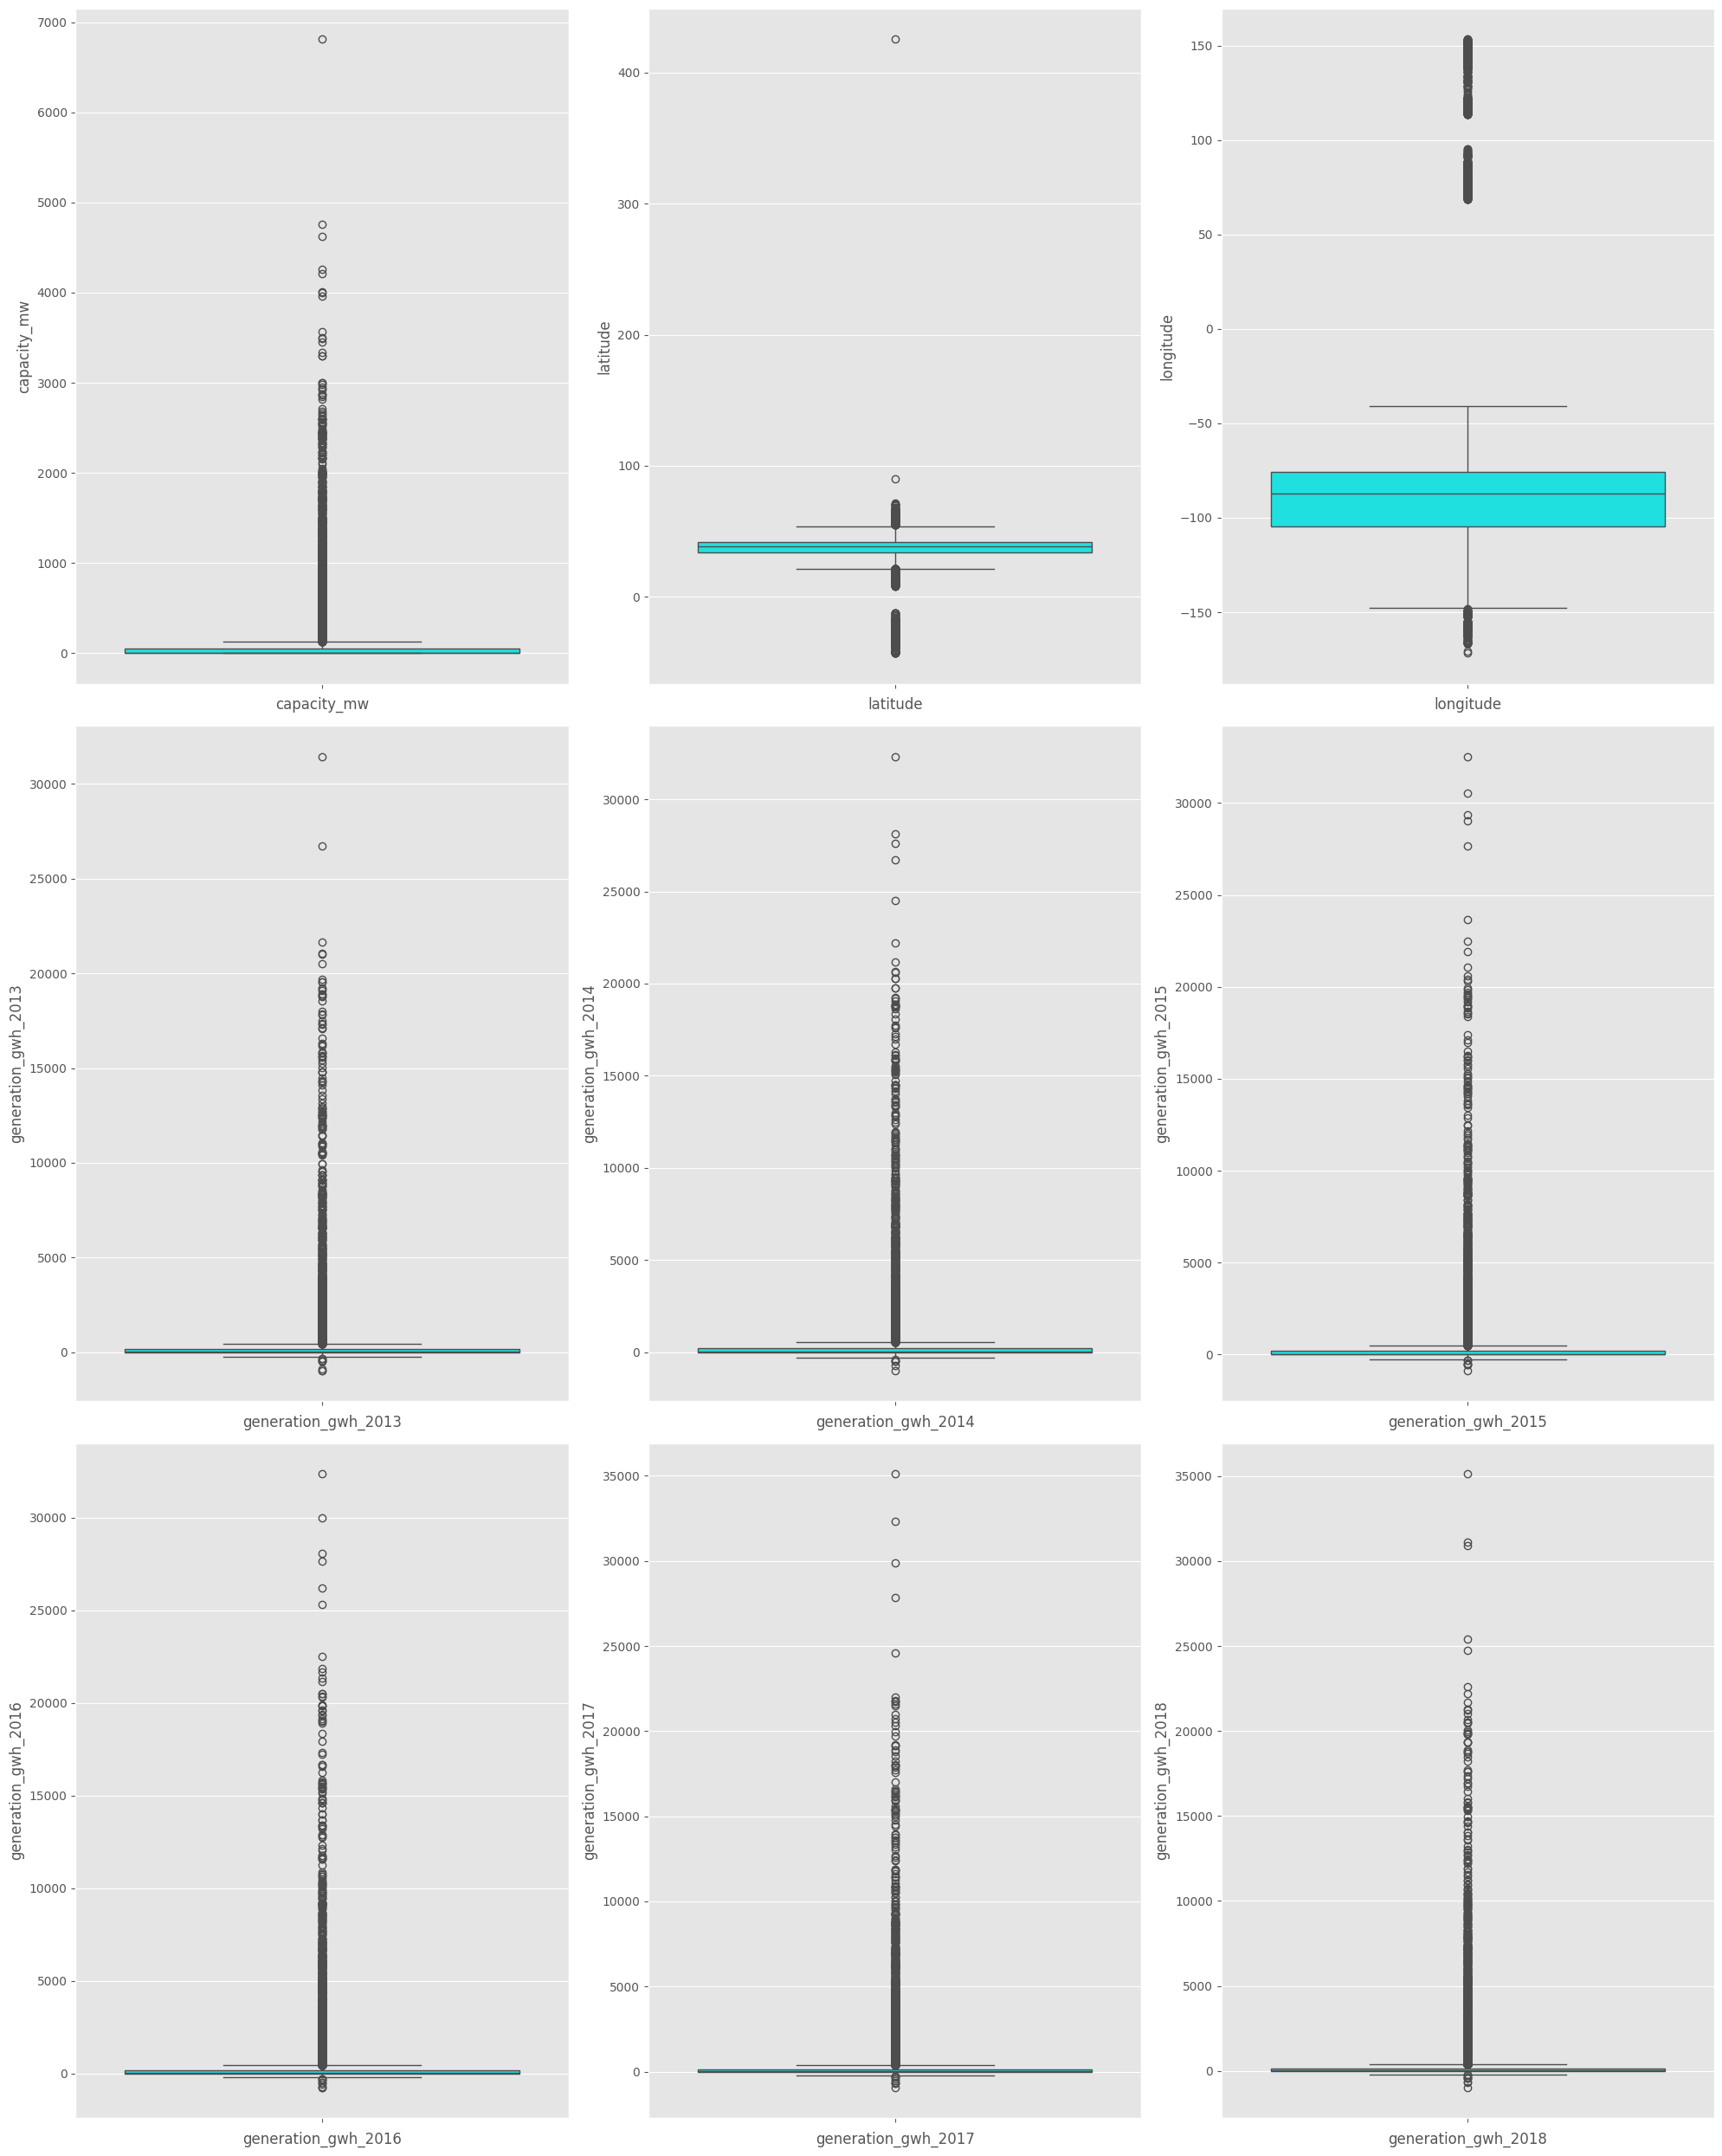

In [39]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

### Comment :
- There outliers exist in data.
- There are no outliers in lower capping level.
- So we will use Quantile-based Flooring and Capping technique.

**Further outliers investigation will be done bases Quantile-based Flooring and Capping technique. In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values**

In [40]:
# Removal of unnessary columns
data.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [41]:
data1=data.copy

In [42]:
data2=data.copy()
Q1 = data2.quantile(0)
Q3= data2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

capacity_mw              52.725000
latitude                 85.054325
longitude                96.176975
primary_fuel             13.000000
other_fuel1              12.000000
commissioning_year      119.000000
generation_gwh_2013    1132.926498
generation_gwh_2014    1206.688500
generation_gwh_2015    1064.707000
generation_gwh_2016     941.968004
generation_gwh_2017    1092.833687
generation_gwh_2018    1131.763250
generation_gwh_2019     901.201000
dtype: float64


In [43]:
data3 = data2[~((data2 < (Q1 - 1.5 * IQR)) |(data2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data3.shape)

(10232, 13)


In [44]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


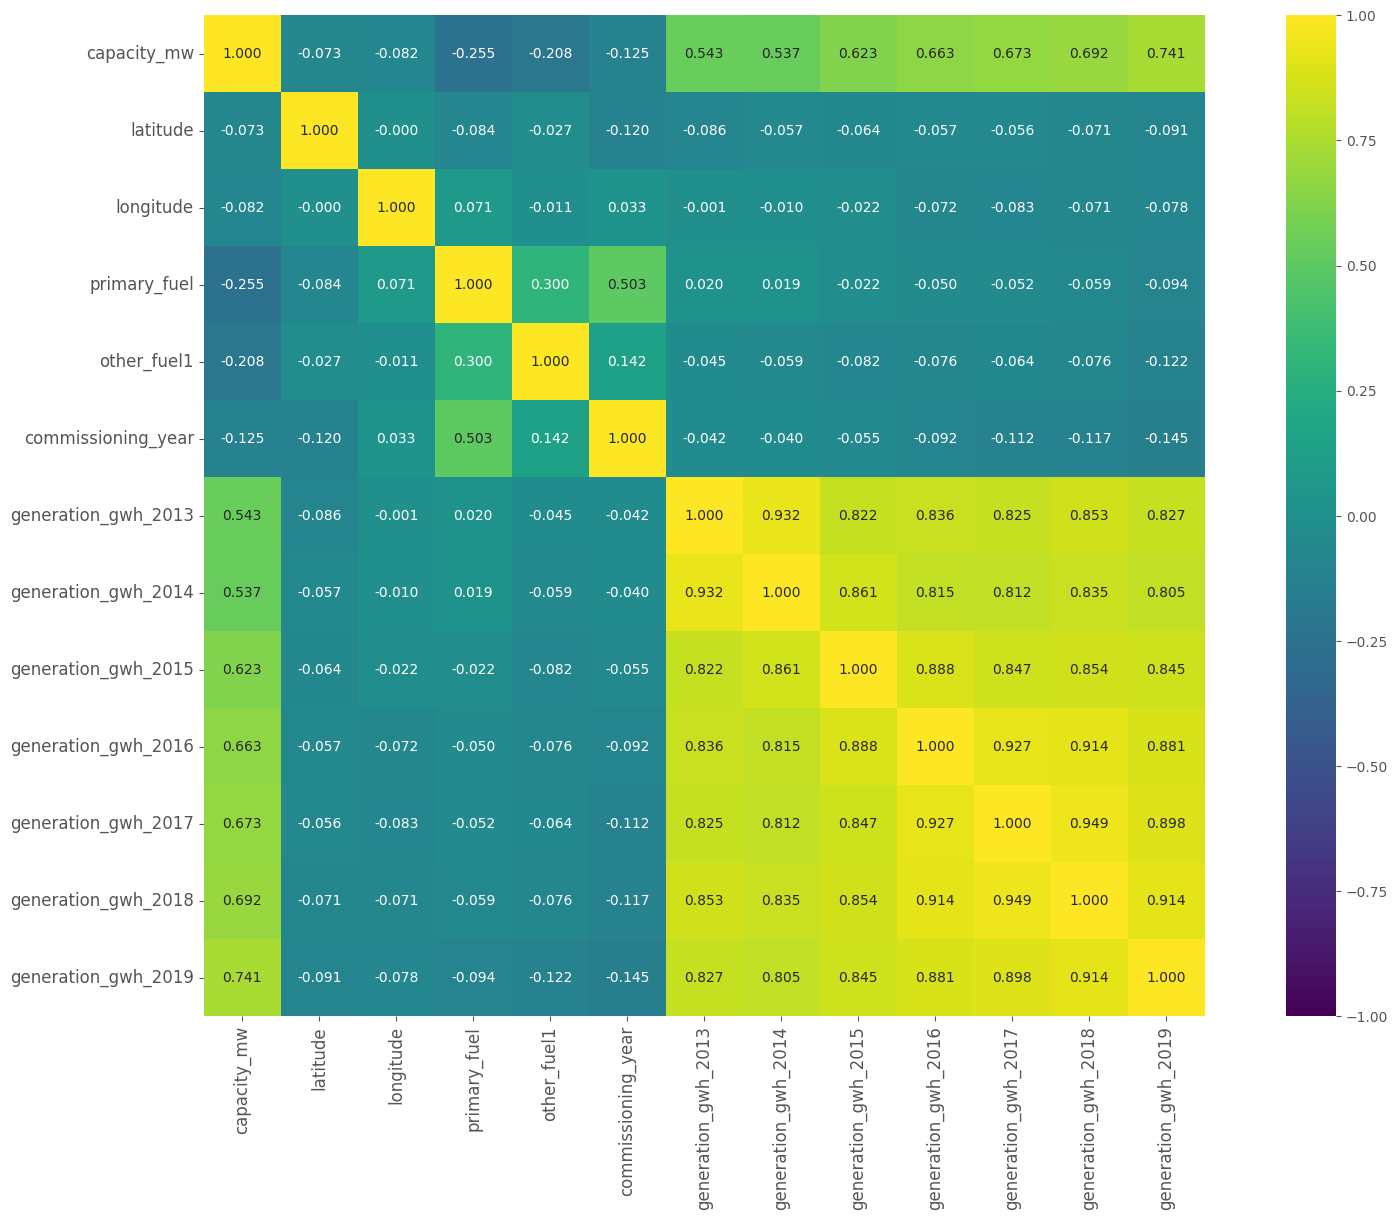

In [45]:
plt.figure(figsize=(21, 13))
sns.heatmap(data3.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size':10}, cmap="viridis")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


- The label capacity_mw is highly positively correlated with the features.generation_gwh_2019 , features generation_gwh_2018,features generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014,generation_gwh_2013.
- capaity is negatively correlated with the features primary_fuel, source and Powe_plant_age.

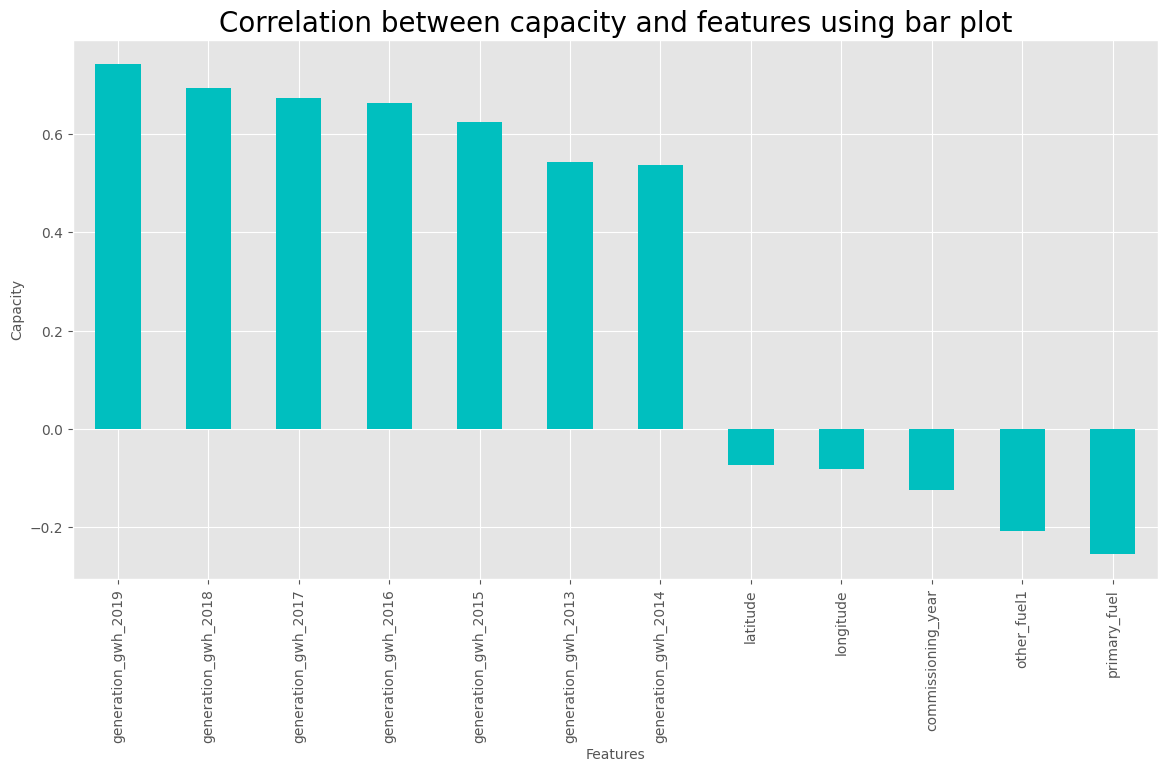

In [46]:
plt.figure(figsize=(14,7))
data3.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

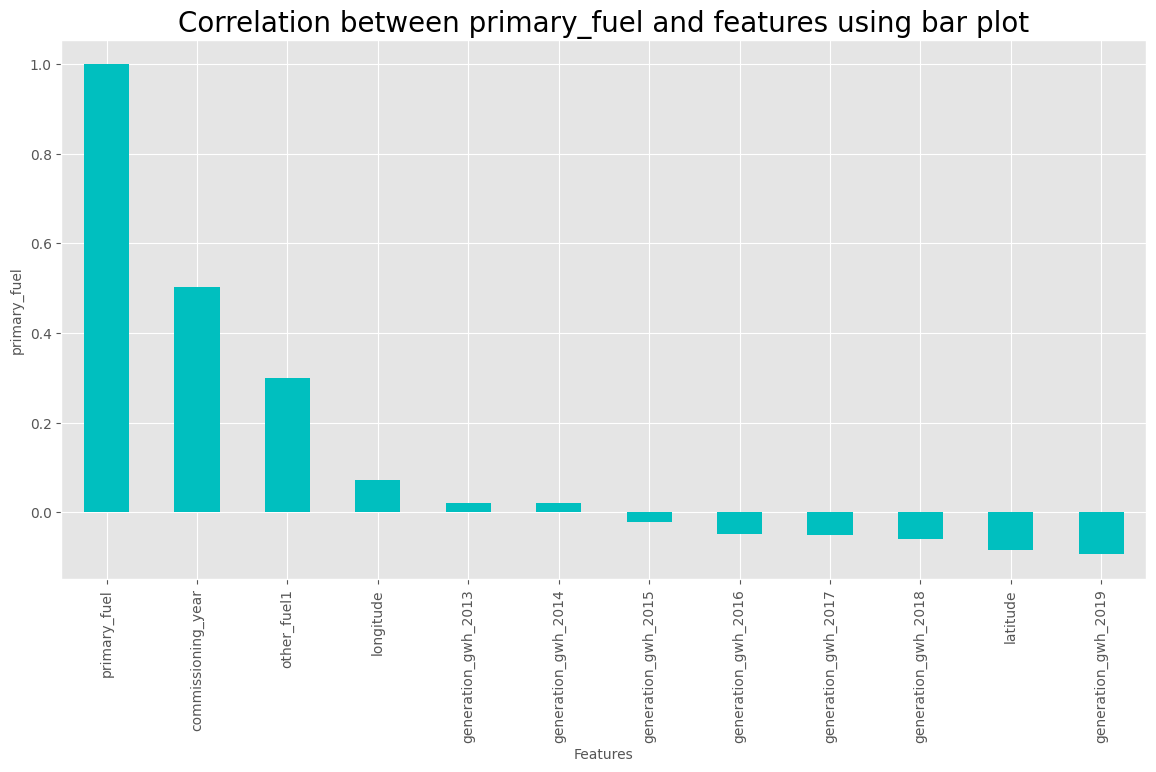

In [47]:
plt.figure(figsize=(14,7))
data3.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

# Skewness

In [48]:
data3.skew()

capacity_mw            2.372923
latitude               0.426092
longitude             -0.712990
primary_fuel          -0.472047
other_fuel1           -3.210033
commissioning_year    -1.784667
generation_gwh_2013    4.306242
generation_gwh_2014    5.065762
generation_gwh_2015    4.096799
generation_gwh_2016    3.583478
generation_gwh_2017    3.788309
generation_gwh_2018    3.871083
generation_gwh_2019    3.448375
dtype: float64

In [49]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [50]:
data3[skew] = scaler.fit_transform(data3[skew].values)
data3[skew].head()

longitude  other_fuel1  generation_gwh_2013  generation_gwh_2014  \
526    0.34253     0.315631                  NaN                  NaN   
537    0.34253     0.315631                  NaN                  NaN   
579    0.34253     0.315631                  NaN                  NaN   
584    0.34253     0.315631                  NaN            -0.537483   
690    0.34253     0.315631             -0.48226                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
526                  NaN                  NaN                  NaN   
537                  NaN                  NaN                  NaN   
579                  NaN                  NaN                  NaN   
584            -0.539452            -0.587536            -0.587888   
690                  NaN                  NaN                  NaN   

     generation_gwh_2018  generation_gwh_2019  
526                  NaN                  NaN  
537                  NaN                  NaN  
579                  NaN                  NaN  
584            -0.589675                  NaN  
690                  NaN                  NaN

In [51]:
# checking skewness after using yeo-johnson
data3.skew()

capacity_mw            2.372923
latitude               0.426092
longitude             -0.620247
primary_fuel          -0.472047
other_fuel1           -2.859212
commissioning_year    -1.784667
generation_gwh_2013   -6.514029
generation_gwh_2014   -6.150474
generation_gwh_2015   -6.068118
generation_gwh_2016   -5.135022
generation_gwh_2017   -5.680042
generation_gwh_2018   -7.571480
generation_gwh_2019   -5.032370
dtype: float64

In [52]:
# We will drop other fuel as result of poor correlation and lot of missing values
data3.drop("other_fuel1",axis=1,inplace=True)

**Since we have done with EDA NOW its time for removal of missing data***

In [53]:
data3.drop("generation_gwh_2013",axis=1,inplace=True)
data3.drop("generation_gwh_2014",axis=1,inplace=True)
data3.drop("generation_gwh_2015",axis=1,inplace=True)
data3.drop("generation_gwh_2016",axis=1,inplace=True)
data3.drop("generation_gwh_2017",axis=1,inplace=True)
data3.drop("generation_gwh_2018",axis=1,inplace=True)
data3.drop("generation_gwh_2019",axis=1,inplace=True)

## Machine Learning Model Building Classification

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


# Standard Scaling

In [55]:
# Splitting data in target and dependent feature
X = data3.drop(['primary_fuel'], axis =1)
Y = data3['primary_fuel']

In [56]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (7162, 4)
Training target vector size: (7162,)
Test feature matrix size: (3070, 4)
Test target vector size: (3070,)


# Logistic Regression

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Impute missing values with mean for both X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the logistic regression model
logistic_regression = LogisticRegression()

# Train the model on the training data with imputed values
logistic_regression.fit(X_train_imputed, Y_train)

# Make predictions on the testing data
Y_pred = logistic_regression.predict(X_test_imputed)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.6798045602605863


# DecisionTreeClassifier

In [59]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_scale_imputed = imputer.fit_transform(X_scale)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scale_imputed, Y, random_state=737, test_size=.3)

# Initialize the decision tree classifier
dtc = DecisionTreeClassifier()

# Train the model on the training data
dtc.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = dtc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("DecisionTreeClassifier Accuracy:", accuracy)


DecisionTreeClassifier Accuracy: 0.739413680781759


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy 'mean', 'median', or 'most_frequent'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Impute missing values in training and testing sets
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize Random Forest Classifier
rfc = RandomForestClassifier()

# Now you can train your model on the imputed training data
rfc.fit(X_train_imputed, Y_train)

# Make predictions on the testing data
Y_pred = rfc.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Random Forest Classifier Accuracy:", accuracy)



Random Forest Classifier Accuracy: 0.8123778501628665


# Cross Validation

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize SimpleImputer with strategy 'mean', 'median', or 'most_frequent'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the entire dataset
imputer.fit(X_scale)

# Impute missing values in the dataset
X_scale_imputed = imputer.transform(X_scale)

# Define models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# Perform cross-validation for each model
for model in models:
    scores = cross_val_score(model, X_scale_imputed, Y, cv=5)
    print('\n')
    print('\033[1m' + 'Cross Validation Scores for', model.__class__.__name__, ':' + '\033[0m\n')
    print("Scores:", scores)
    print("Mean Score:", scores.mean())
    print("Standard Deviation:", scores.std())
    print('\n')
    print('============================================================================================================')




Cross Validation Scores for LogisticRegression :

Scores: [0.6741573  0.68832438 0.68230694 0.68377322 0.65835777]
Mean Score: 0.6773839216343588
Standard Deviation: 0.01055611885530103




Cross Validation Scores for DecisionTreeClassifier :

Scores: [0.70786517 0.73913043 0.7512219  0.71847507 0.72385142]
Mean Score: 0.7281087980837417
Standard Deviation: 0.015339036924686267




Cross Validation Scores for RandomForestClassifier :

Scores: [0.78114314 0.81875916 0.80742913 0.80742913 0.79178886]
Mean Score: 0.8013098824735051
Standard Deviation: 0.013241716269427134




## We can see that RandomForestClassifier() gives us good Accuracy

- we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

## Hyper Parameter Tuning : GridSearchCV

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Define RandomForestClassifier
rfc = RandomForestClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_imputed, Y)

# Retrieve the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best hyperparameters:", best_params)
print("Best estimator:", best_estimator)


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best estimator: RandomForestClassifier(max_depth=20, min_samples_split=5)


# Final model RandomForesrClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Define the best hyperparameters obtained from GridSearchCV
best_params = {
    'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 150
}

# Initialize the RandomForestClassifier with the best hyperparameters
final_model = RandomForestClassifier(**best_params)

# Handle missing values in the entire dataset X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train the final model on the entire dataset with imputed values
final_model.fit(X_imputed, Y)

# Now, 'final_model' represents the RandomForestClassifier with the best hyperparameters

RandomForestClassifier(min_samples_split=5, n_estimators=150)

In [64]:
# Convert 'new_data' to a 2D array with a single row
new_data = [['25.2', '35.053213', '0.34253', '2000.0']]

# Handle missing values in the new dataset
new_data_imputed = imputer.transform(new_data)

# Make predictions using the final model
predictions = final_model.predict(new_data_imputed)

# 'predictions' now contains the predicted label for the new data point
print("Predicted label:", predictions[0])

Predicted label: 7


# Saving the Model

In [65]:
from joblib import dump

# Define the file path where you want to save the model
model_file_path = 'final_model.joblib'

# Save the final model to the specified file path
dump(final_model, model_file_path)

print("Model saved successfully.")


Model saved successfully.


# Task Second prediction of capacity_mw

<Axes: >

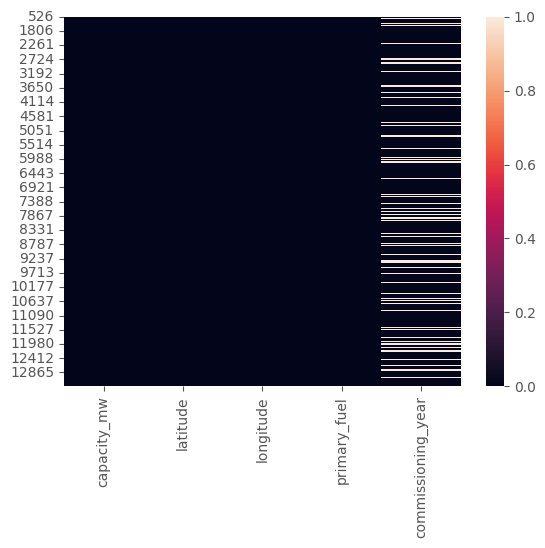

In [66]:
data3.isnull().sum()
sns.heatmap(data3.isnull())

In [67]:
data3.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year'],
      dtype='object')

In [68]:
# Fill null values using backward fill
data3['commissioning_year'].fillna(method='bfill', inplace=True)

<Axes: >

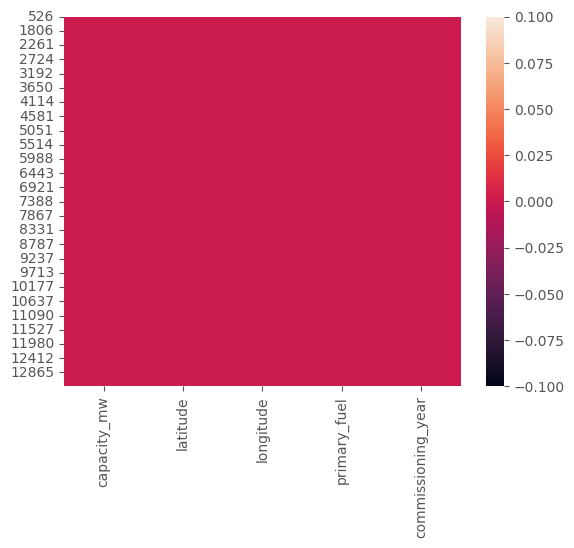

In [69]:
sns.heatmap(data3.isnull())

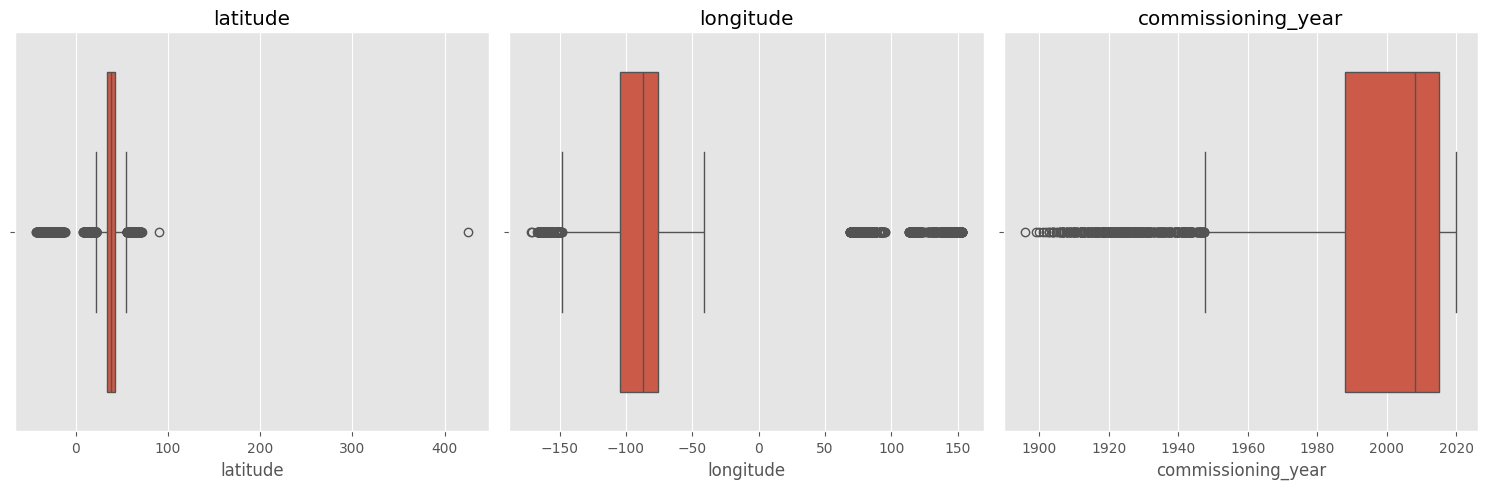

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = ['latitude', 'longitude', 'commissioning_year']

# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

# Plot box plots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [71]:
# Define a function to remove outliers using the IQR method for specific columns
def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Columns to remove outliers from
columns_to_remove_outliers = ['latitude', 'longitude', 'commissioning_year']

# Remove outliers from the specified columns using the IQR method
data3_without_outliers = remove_outliers_iqr(data3, columns_to_remove_outliers)

In [72]:
data3_without_outliers.head()

capacity_mw   latitude  longitude  primary_fuel  commissioning_year
526          9.0  35.053213    0.34253             5              1987.0
537         50.0  35.053213    0.34253            10              2015.0
579          5.0  35.053213    0.34253            13              2000.0
584         25.2  35.053213    0.34253             7              2000.0
690          5.0  35.053213    0.34253             5              1997.0

<Axes: xlabel='latitude'>

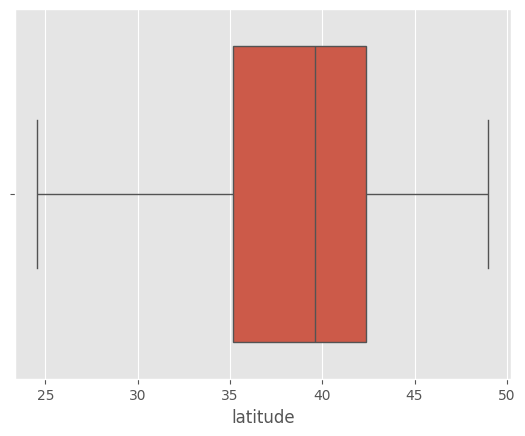

In [73]:
# Plot a box plot
sns.boxplot(x=data3_without_outliers['latitude'])

In [74]:
data3 =data3_without_outliers

In [75]:
# Splitting data in target and dependent feature
X = data3.drop(['capacity_mw'], axis =1)
Y = data3['capacity_mw']

In [76]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6531, 4)
Training target vector size: (6531,)
Test feature matrix size: (2800, 4)
Test target vector size: (2800,)


In [78]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy 'mean', 'median', or 'most_frequent'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Impute missing values in training and testing sets
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)


 ## LinearRegression

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_imputed, Y_train)

# Make predictions on the testing data
Y_pred = model.predict(X_test_imputed)
# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 650.7051857671366
R-squared Score: 0.11277533041400356


# Random ForestRegressor

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Initialize SimpleImputer with strategy 'mean', 'median', or 'most_frequent'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Impute missing values in training and testing sets
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize RandomForestRegressor
rf = RandomForestRegressor()

# Train the model
rf.fit(X_train_imputed, Y_train)

# Make predictions on the testing data
Y_pred = rf.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 411.4726237445895
R-squared Score: 0.4389645716207323


#  DecisionTreeRegressor

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Initialize SimpleImputer with strategy 'mean', 'median', or 'most_frequent'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Impute missing values in training and testing sets
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Train the model
dt.fit(X_train_imputed, Y_train)

# Make predictions on the testing data
Y_pred = dt.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 698.1162673859127
R-squared Score: 0.04813118411856199


#  AdaBoostRegressor

In [82]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Initialize SimpleImputer with strategy 'mean', 'median', or 'most_frequent'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Impute missing values in training and testing sets
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize AdaBoostRegressor
adb = AdaBoostRegressor(learning_rate=0.1)  # Adjust learning_rate as needed

# Train the model
adb.fit(X_train_imputed, Y_train)

# Make predictions on the testing data
Y_pred = adb.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 608.6140847537131
R-squared Score: 0.17016578004615024


# GradientBoostingRegressor

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Initialize SimpleImputer with strategy 'mean', 'median', or 'most_frequent'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Impute missing values in training and testing sets
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize GradientBoostingRegressor
gradb = GradientBoostingRegressor(alpha=0.01)

# Train the model
gradb.fit(X_train_imputed, Y_train)

# Make predictions on the testing data
Y_pred = gradb.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 479.4865231365449
R-squared Score: 0.34622885852795604


# XGBRegressor

In [84]:
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Initialize SimpleImputer with strategy 'mean', 'median', or 'most_frequent'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Impute missing values in training and testing sets
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize XGBRegressor
xgb = XGBRegressor(alpha=0.01)

# Train the model
xgb.fit(X_train_imputed, Y_train)

# Make predictions on the testing data
Y_pred = xgb.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 426.66639356459575
R-squared Score: 0.4182481431932742


# Cross validation

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor from sklearn.tree
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define your models
rf = RandomForestRegressor()
rd = DecisionTreeRegressor()
dtc = AdaBoostRegressor(learning_rate=0.1)
adb = GradientBoostingRegressor()
xgb = XGBRegressor()

# List of models
models = [rf, rd, dtc, adb, xgb]

# Preprocess data if needed (imputation, scaling, etc.)
# For example, using SimpleImputer to handle missing values and StandardScaler to scale the data
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_imputed)

# Perform cross-validation for each model
for m in models:
    scores = cross_val_score(m, X_scale, Y, cv=5)  # 5-fold cross-validation
    print('\n')
    print('\033[1m' + 'Cross Validation Scores for ' + str(m) + ':' + '\033[0m\n')
    print("Mean CV Score:", scores.mean())
    print('===')




Cross Validation Scores for RandomForestRegressor():

Mean CV Score: 0.39463015428512727
===


Cross Validation Scores for DecisionTreeRegressor():

Mean CV Score: -0.056881104240123735
===


Cross Validation Scores for AdaBoostRegressor(learning_rate=0.1):

Mean CV Score: 0.18953185205466586
===


Cross Validation Scores for GradientBoostingRegressor():

Mean CV Score: 0.347648264257359
===


Cross Validation Scores for XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight

# Final Rndom forest Model

In [99]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize SimpleImputer with strategy 'mean', 'median', or 'most_frequent'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Impute missing values in training and testing sets
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define the RandomForestRegressor with the best parameters
# Define the RandomForestRegressor with adjusted parameters
rf = RandomForestRegressor(n_estimators=150,
                            max_depth=100,
                            min_samples_leaf=2,
                            min_samples_split=6,
                            max_features='sqrt',
                            random_state=42)

# Train the model
rf.fit(X_train_imputed, Y_train)

# Make predictions
Y_pred = rf.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 400.86885157502763
R-squared Score: 0.45342262184882975


In [101]:
import joblib

# Define the path where you want to save the model
model_path = 'random_forest_regressor_model.pkl'

# Save the trained model to the specified path
joblib.dump(rf, model_path)

print("Model saved successfully at:", model_path)

Model saved successfully at: random_forest_regressor_model.pkl
